<a href="https://colab.research.google.com/github/TomoharuKurosu/Tomoaharu_Kurosu_2023/blob/main/%E3%83%A9%E3%82%A4%E3%83%95%E3%82%BB%E3%83%BC%E3%83%93%E3%83%B3%E3%82%B0%E3%80%80%E4%BA%8B%E6%95%85%E7%99%BA%E7%94%9F%E7%A2%BA%E7%8E%87%E3%81%AE%E7%AE%97%E5%87%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

In [4]:
#データの読み込み
df = pd.read_csv("/content/drive/MyDrive/lifesaving_accident_significant_factor.csv")
#data = pd.read_csv("/content/drive/MyDrive/BostonHouseData.csv")

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23455 (\N{CJK UNIFIED IDEOGRAPH-5B9F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38555 (\N{CJK UNIFIED IDEOGRAPH-969B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000023 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 74
[LightGBM] [Info] Number of data points in the train set: 154, number of used features: 4
[LightGBM] [Info] Start training from score 0.025974
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20104 (\N{CJK UNIFIED IDEOGRAPH-4E88}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28204 (\N{CJK UNIFIED IDEOGRAPH-6E2C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


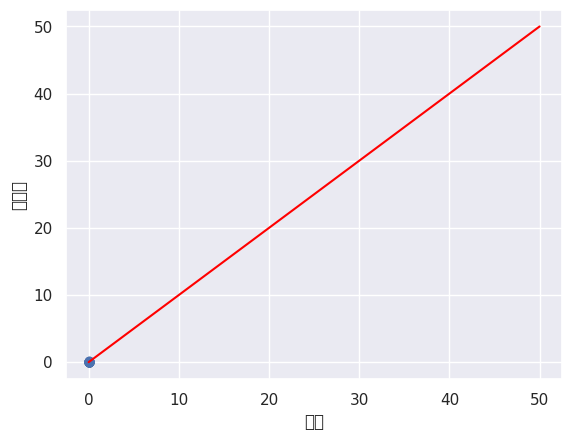

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

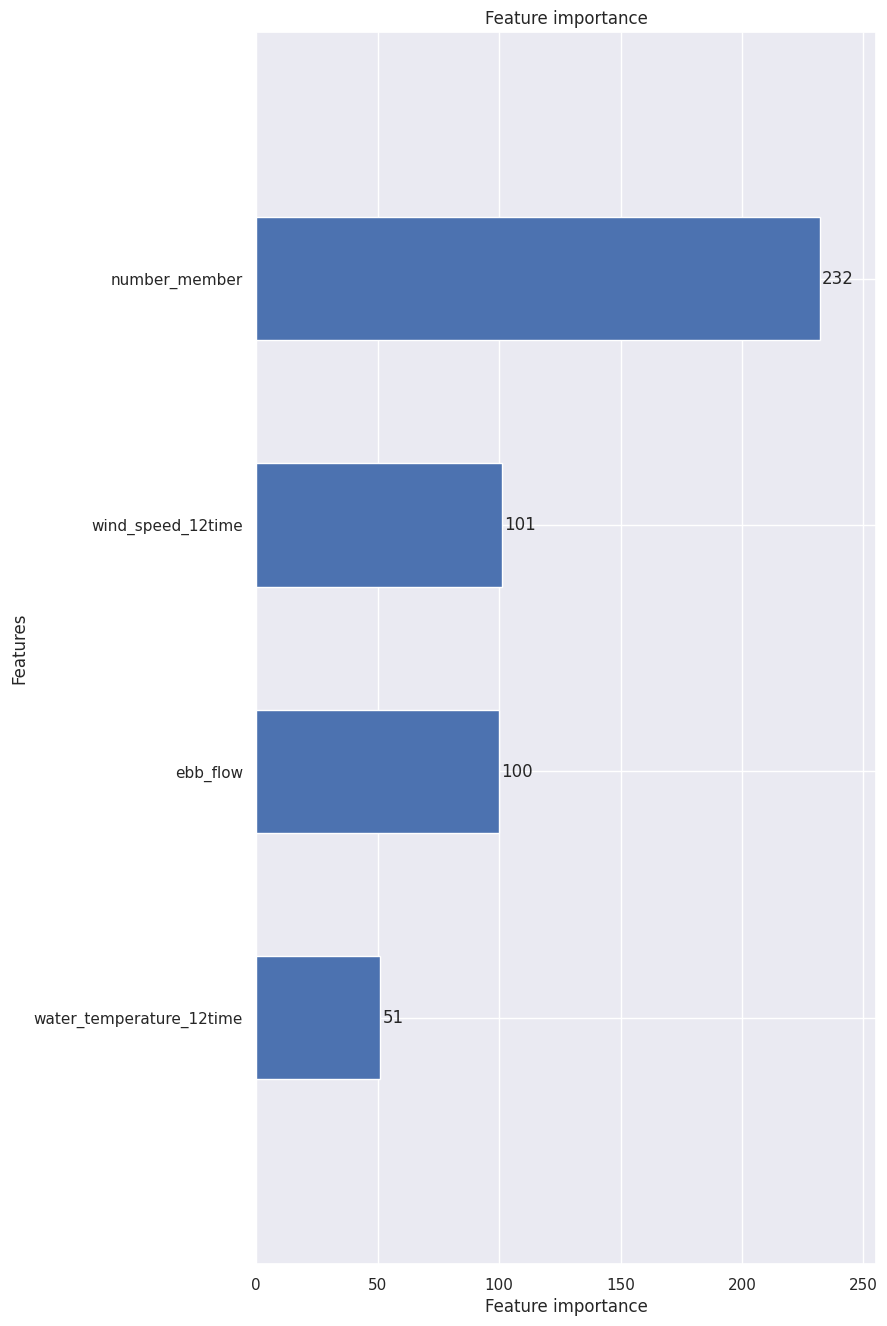

In [7]:
#必要なモジュールのインストール
!pip install LightGBM
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns


#予測ターゲットの格納（house_price：A列）
target_df = df[["accident"]]
#特徴量の格納（説明変数：B列以降）
train_df = df.iloc[:,1:5]

#モデル学習のための、訓練データとテストデータを7:3で分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df, target_df, test_size=0.3)

#XGBoostで学習するためのデータ形式に変換
dtrain = lgb.Dataset(X_train, y_train)
dvalid = lgb.Dataset(X_test, y_test)

#モデルパラメータの設定
params = {'metric' : 'rmse'}
model = lgb.train(params,dtrain)

#予測の実行と書き出し
pred = model.predict(X_test)
print(pred)

#散布図で予測の精度を描写
sns.set(font=['Meiryo','Yu Gothic'])
plt.scatter(y_test, pred, alpha = 0.5)
plt.plot(np.linspace(0, 50, 100), np.linspace(0, 50, 100), "red")
plt.xlabel('実際')
plt.ylabel('予測値')
plt.show()

# 性能向上に寄与する度合いで重要度をプロット
lgb.plot_importance(model, height = 0.5, figsize = (8,16))

In [8]:
#適当なデータを入れて予測（model.predict([[?,?,?,?,?,?,?,?,?,?,?,?]])）
pred = model.predict([[0.9,14,26,0.5]])
print(pred)

[0.01298657]


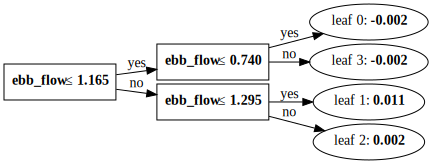

In [9]:
# 決定木の分岐の可視化
lgb.create_tree_digraph(model, 1)